In [1]:
from fastai.text import *
from fastai.datasets import *
from pathlib import Path
import pandas as pd
from fastai.metrics import *
from fastai.train import *
from fastai.vision import *
from fastai.imports import nn, torch
from sklearn import metrics
from fastai.callbacks import *
from fastai.basic_train import get_preds

import sklearn.metrics
import datetime
torch.cuda.set_device(1)

import fastai
fastai.__version__

'1.0.22'

In [2]:
EX_PA = Path('/mnt/data/group07/johannes/ynacc_proc/replicate/lmmodels')

In [3]:
data_lm = TextLMDataBunch.load(EX_PA)

In [4]:
learn = language_model_learner(data_lm, drop_mult=0.2).load(EX_PA/"models"/"2018_11_11_16_27_24_932260")

In [5]:
learn.unfreeze()

In [6]:
learn.lr_find(start_lr=1e-10, end_lr=1e-2, num_it=1000)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


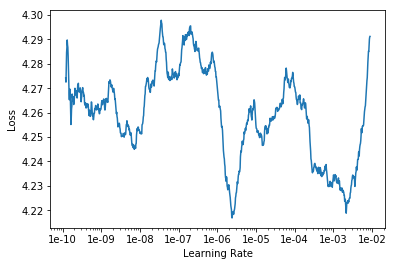

In [7]:
learn.recorder.plot()

In [8]:
lr = 1e-7
factor = 2.6

In [9]:
learn.fit_one_cycle(1, [lr / factor*3, lr / factor*2, lr / factor, lr])

Total time: 08:01
epoch  train_loss  valid_loss  accuracy
1      4.253659    4.370007    0.251342  (08:01)



## 1      4.109582    4.304508    0.257547  (08:11)

learn.fit_one_cycle(1, [1e-4 / 2.6**3, 1e-4 / 2.6**2, 1e-4 / 2.6, 1e-4])

executed in 8m 12s, finished 19:20:35 2018-11-11

Total time: 08:12
epoch  train_loss  valid_loss  accuracy
1      4.229061    4.340976    0.253476  (08:12)

